# Expectation-Maximization Algorithm - k-Means

In [2]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = load_iris()
X = data['data']
y = data['target']

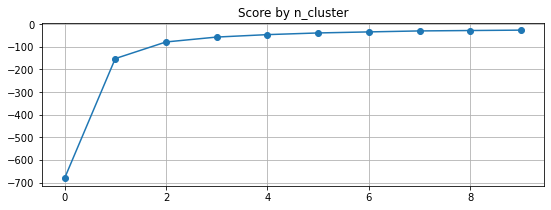

In [31]:
max_n_clusters = 10
scores = []
for i in range(1,max_n_clusters+1):
    model = KMeans(n_clusters=i)
    model.fit(X)
    scores.append(model.score(X))


plt.figure(figsize=(9,3))
plt.title(f"Score by n_cluster")
plt.plot(range(max_n_clusters),scores,"o-")
plt.grid(True)
plt.show()

In [32]:
def plot_clusters_by_n_clusters(n_clusters):
    model = KMeans(n_clusters)
    model.fit(X)
    clusters = model.predict(X)

    df = pd.DataFrame(data=X)
    df['cluster'] = clusters
    df['target'] = y

    plt.figure()
    plt.title(f"Score: {model.score(X)}")
    for i in range(n_clusters):
        plt.plot(df[df['cluster']==i].values[:,0],df[df['cluster']==i].values[:,1],'o',label=i)
    plt.legend(loc=0)
    plt.show()

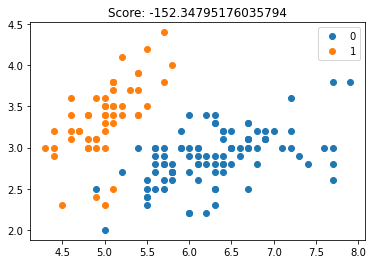

In [33]:
plot_clusters_by_n_clusters(2)

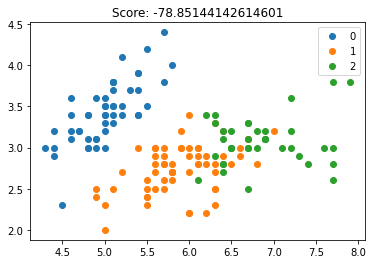

In [34]:
plot_clusters_by_n_clusters(3)

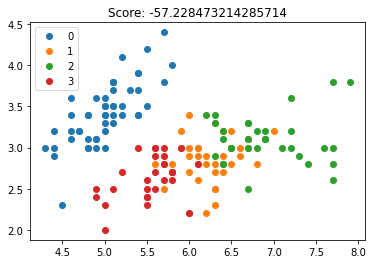

In [35]:
plot_clusters_by_n_clusters(4)

In [67]:
from scipy.spatial.distance import euclidean

In [219]:
def init_mu(k,X):
    return np.array([np.random.normal(loc=X[:,i].mean(),size=(k,)) for i in range(X.shape[1])]).T

def get_nearest_cluster(x):
    return np.argmin([euclidean(x,mu[i]) for i in range(k)])

def get_nearest_clusters(X):
    return np.apply_along_axis(get_nearest_cluster,1,X)

def transform_array_in_r(k,x):
    return np.eye(k)[x]

def compute_r(k,X):
    clusters_list = get_nearest_clusters(X)
    return transform_array_in_r(k,clusters_list)

def plot_clusters(k,R,X):
    plt.figure()
    plt.title(f"n_clusters: {k}")
    for i in range(k):
        plt.plot(mu[i][0],mu[i][1],'X',color="k")
        plt.plot(X[np.argwhere(R[:,i]==1).ravel()][:,0],X[np.argwhere(R[:,i]==1).ravel()][:,1],'o',label=i,alpha=0.7)
    plt.legend(loc=0)
    plt.show()

def update_mu(k,R,X):
    for i in range(k):
        cluster_size = max(np.argwhere(R[:,i]==1).ravel().shape[0],1)
        mu[i] = X[np.argwhere(R[:,i]==1).ravel()].sum(axis=0) / cluster_size
    return mu

def compute_distortion(k,mu,R,X):
    return np.sum([np.sum((X[np.argwhere(R[:,i]==1).ravel()] - (R[i] @ mu))**2) for i in range(k)])

0 1725.6376134122293


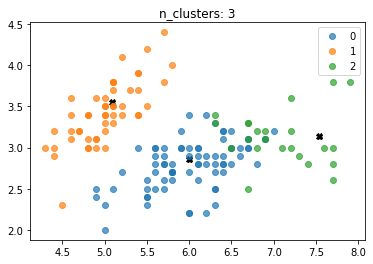

1 1734.2178000000001


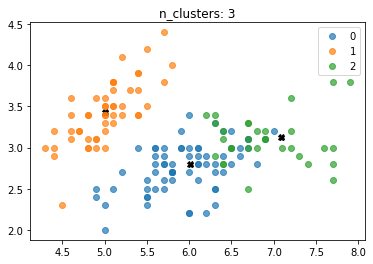

Convergence achieved


In [239]:
k = 3
stop_criterion = 1e-12
mu = init_mu(k,X)
R = compute_r(k,X)
distortion = np.infty
for epoch in range(20):
    mu = update_mu(k,R,X)
    R = compute_r(k,X)
    new_distortion = compute_distortion(k,mu,R,X)
    if abs(new_distortion - distortion) <= stop_criterion:
        print("Convergence achieved")
        break
    distortion = new_distortion
    print(epoch,distortion)
    plot_clusters(k,R,X)